# Exploring the India Cotton Dataset for clustering

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 100)
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

### Loading data

In [2]:
df = pd.read_excel('SOLIDARIDAD - DATASETS/INDIA_COTTON/IN_cotton_survey.xlsx')

In [3]:
df.head().T

,0,1,2,3,4
farmer_id,c1,c10,c11,c12,c13
group,control,control,control,control,control
adaptation_score_abs,20,8,19,20,17
mitigation_score_abs,-7,-2,-5,-5,-5
adaptation_score_normal,47.2222,30.5556,45.8333,47.2222,43.0556
mitigation_score_normal,39.1304,60.8696,47.8261,47.8261,47.8261
bank_account,1,1,1,1,1
bicycle,1,1,2,1,1
car,2,2,2,2,2
cell_phone,1,1,1,1,1


### EDA supported by pandas-profiling library
This library writes an HTML file to the root, which explores each of the variables and highlights potential issues between them

In [4]:
# profile = df.profile_report(title='Pandas Profiling Report - India Cotton')
# profile.to_file(output_file="India-Cotton-Profile.html")

### Data Cleaning
Using what we learned in the profiling report, clean the dataset

In [5]:
# Based on Pandas profiling file, these variables can be dropped due to high correlations or constant value
VARS_TO_DROP = ['adaptation_score_normal','cotton_sold','intercrop_harvest','intercrop_income',
                'leased_land','mitigation_score_normal','own_land','oxes','preharvest_acre',
               'presow_acre','productivity_actual','productivity_estimated','seed_actual','seed_cost',
               'seed_estimated','total_income', 'intercrop_acre','seed_source', 'irrigated_land']

In [6]:
df = df.drop(columns=VARS_TO_DROP)

In [7]:
df.head().T

,0,1,2,3,4
farmer_id,c1,c10,c11,c12,c13
group,control,control,control,control,control
adaptation_score_abs,20,8,19,20,17
mitigation_score_abs,-7,-2,-5,-5,-5
bank_account,1,1,1,1,1
bicycle,1,1,2,1,1
car,2,2,2,2,2
cell_phone,1,1,1,1,1
cooler,1,1,1,1,1
crop_insurance,1,2,2,1,2


The coding of boolean variables from source is 1 for Yes and 2 for No, I recode them to 1 for Yes and 0 for No as this allows us to just take the mean of the value and interpret this as a percentage

In [8]:
# Fix boolean variables
BOOLEAN_VARS = ['bank_account','bicycle','car','cell_phone','cooler','crop_insurance','electricity','fridge','life_insurance',
               'loan','motorcycle','ploughing_cart','tractor','tv','weeder','landholding']

In [9]:
for col in BOOLEAN_VARS:
    df.loc[df[col] == 2, col] = 0

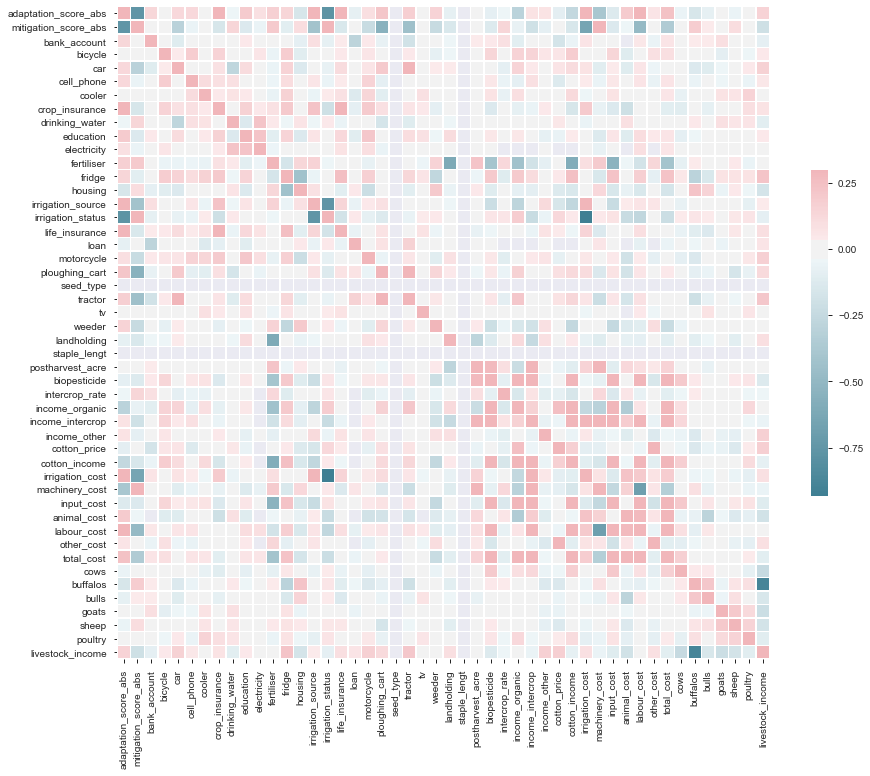

In [10]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
df.corr().assign(adaptation_score_abs_cor = lambda df: df['adaptation_score_abs'].abs())\
.sort_values(by='adaptation_score_abs_cor', ascending=False)['adaptation_score_abs']

adaptation_score_abs    1.000000
irrigation_status      -0.777185
mitigation_score_abs   -0.760323
irrigation_cost         0.719963
labour_cost             0.542369
irrigation_source       0.538057
life_insurance          0.431202
machinery_cost         -0.385420
crop_insurance          0.352564
income_organic         -0.295389
cotton_income          -0.254001
total_cost              0.240532
ploughing_cart          0.219997
animal_cost             0.192744
education               0.191083
tractor                 0.179366
fertiliser              0.171169
housing                -0.161292
buffalos               -0.160037
livestock_income        0.159908
weeder                  0.155319
fridge                  0.139859
bank_account            0.133337
car                     0.130445
cell_phone              0.123005
input_cost             -0.122730
motorcycle              0.101124
cotton_price           -0.090707
biopesticide           -0.085277
electricity             0.084118
bulls     

In [12]:
df.dtypes

farmer_id                object
group                    object
adaptation_score_abs      int64
mitigation_score_abs      int64
bank_account              int64
bicycle                   int64
car                       int64
cell_phone                int64
cooler                    int64
crop_insurance            int64
drinking_water            int64
education                 int64
electricity               int64
fertiliser                int64
fridge                    int64
housing                   int64
irrigation_source         int64
irrigation_status         int64
life_insurance            int64
loan                      int64
motorcycle                int64
ploughing_cart            int64
seed_type               float64
tractor                   int64
tv                        int64
weeder                    int64
landholding             float64
staple_lengt            float64
postharvest_acre        float64
biopesticide              int64
intercrop_name           object
intercro

Exploring which columns we have missing values for and cleaning (using the median to impute missing values, but there are better methods to do this!)

In [13]:
df.isna().apply('mean').sort_values(ascending=False).head(15)

animal_cost          0.658759
cotton_price         0.408759
cotton_income        0.408759
income_organic       0.408759
other_cost           0.361314
intercrop_rate       0.361314
intercrop_name       0.361314
staple_lengt         0.361314
income_intercrop     0.361314
seed_type            0.361314
bulls                0.001825
fridge               0.000000
housing              0.000000
irrigation_source    0.000000
electricity          0.000000
dtype: float64

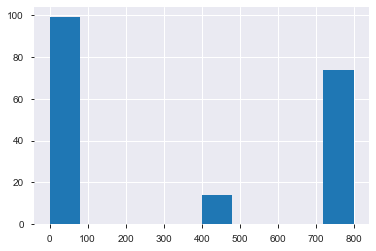

In [14]:
df['animal_cost'].hist()
df.loc[df['animal_cost'].isna(),'animal_cost'] = df['animal_cost'].median()

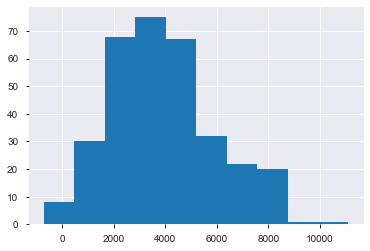

In [15]:
df['income_organic'].hist()
df.loc[df['income_organic'].isna(),'income_organic'] = df['income_organic'].median()

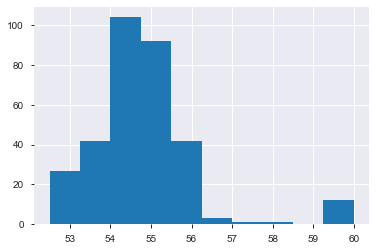

In [16]:
df['cotton_price'].hist()
df.loc[df['cotton_price'].isna(),'cotton_price'] = df['cotton_price'].median()

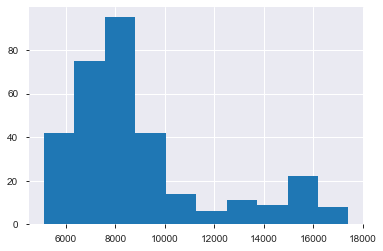

In [17]:
df['cotton_income'].hist()
df.loc[df['cotton_income'].isna(),'cotton_income'] = df['cotton_income'].median()

In [18]:
for col in ['other_cost','income_intercrop','staple_lengt','staple_lengt','intercrop_rate']:
    df.loc[df[col].isna(),col] = df[col].median()

In [19]:
df.loc[df['seed_type'].isna(),'seed_type'] = 0
df.loc[df['bulls'].isna(),'bulls'] = 0
df.loc[df['intercrop_name'].isna(),'intercrop_name'] = 'UNKNOWN'


Need to parse categorical values from strings to numbers

In [20]:
CATEGORICAL_VARS = BOOLEAN_VARS + ['housing','intercrop_name','irrigation_status','seed_type', 'group']
for col in CATEGORICAL_VARS:
    df[col] = df[col].astype('category').cat.codes

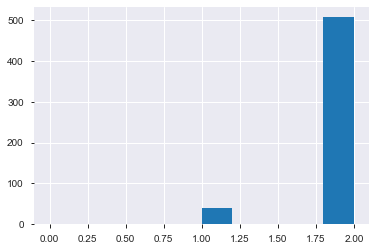

In [21]:
df['bulls'].hist()

In [22]:
df.isna().apply('mean')

farmer_id               0.0
group                   0.0
adaptation_score_abs    0.0
mitigation_score_abs    0.0
bank_account            0.0
bicycle                 0.0
car                     0.0
cell_phone              0.0
cooler                  0.0
crop_insurance          0.0
drinking_water          0.0
education               0.0
electricity             0.0
fertiliser              0.0
fridge                  0.0
housing                 0.0
irrigation_source       0.0
irrigation_status       0.0
life_insurance          0.0
loan                    0.0
motorcycle              0.0
ploughing_cart          0.0
seed_type               0.0
tractor                 0.0
tv                      0.0
weeder                  0.0
landholding             0.0
staple_lengt            0.0
postharvest_acre        0.0
biopesticide            0.0
intercrop_name          0.0
intercrop_rate          0.0
income_organic          0.0
income_intercrop        0.0
income_other            0.0
cotton_price        

In [23]:
df.to_csv('Clean_India_Cotton.csv')

## Clustering
### Random Forest to find variables most predictive of Adaptability score
The idea of using this model is not to produce the best predictive model, but to find a limited number of variables with the most impact in predicting a farmer's predictibility score. Afterwards, these variables can be used to cluster the farmers into their different groups

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf = RandomForestRegressor(n_estimators=300, max_depth = 5, max_features = 0.3, random_state = 1882, min_samples_leaf = 10)

In [26]:
rf.fit(df.drop(columns = ['farmer_id','mitigation_score_abs','adaptation_score_abs']), df['adaptation_score_abs'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features=0.3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=1882,
                      verbose=0, warm_start=False)

These are the top 10 most predictive variables

In [27]:
var_importance = pd.DataFrame({'var':df.drop(columns = ['farmer_id','mitigation_score_abs','adaptation_score_abs']).columns,\
              'importance':rf.feature_importances_}).sort_values(by='importance', ascending=False)

var_importance.head(10)

,var,importance
13,irrigation_source,0.233238
34,irrigation_cost,0.216580
14,irrigation_status,0.139394
40,total_cost,0.102069
38,labour_cost,0.081502
15,life_insurance,0.043836
27,intercrop_name,0.041447
19,seed_type,0.038406
35,machinery_cost,0.015787
22,weeder,0.013072


The following scores and plots are to show whether the model is actually learning the relationship between the variables to see if we can use these variables confidently

In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [29]:
r2_score(df['adaptation_score_abs'],rf.predict(df.drop(columns = ['farmer_id','mitigation_score_abs','adaptation_score_abs'])))

0.9137775225671223

In [30]:
mean_absolute_error(df['adaptation_score_abs'],rf.predict(df.drop(columns = ['farmer_id','mitigation_score_abs','adaptation_score_abs'])))

1.12317432817343

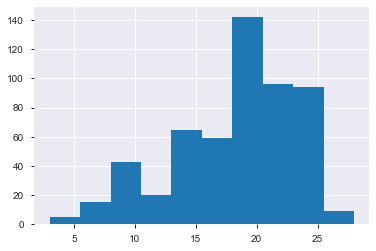

In [31]:
df['adaptation_score_abs'].hist()

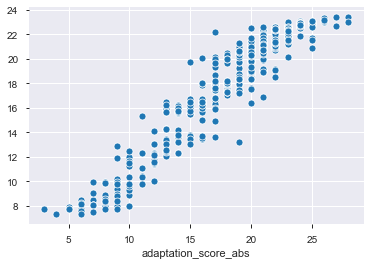

In [32]:
sns.scatterplot(x=df['adaptation_score_abs'], y= rf.predict(df.drop(columns = ['farmer_id','mitigation_score_abs','adaptation_score_abs'])))

### KMeans
In order to cluster the farmers I used the KMeans algorithm

In [33]:
## Clustering with top importance variables
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [34]:
scaler = StandardScaler()
df_km = scaler.fit_transform(df[var_importance['var'][:10]])


The Elbow method allows to see what number of clusters gives us the most gain in terms of reducing variance within the groups. 4 looks like a good number

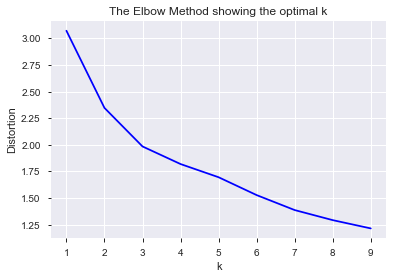

In [35]:
# k means determine k
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_km)
    kmeanModel.fit(df_km)
    distortions.append(sum(np.min(cdist(df_km, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_km.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Assign and plot the clusters

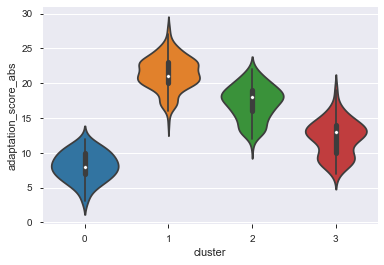

In [36]:
km = KMeans(n_clusters=4, random_state=1882)
km.fit(df_km)
clusters = km.predict(df_km)
df['cluster'] = clusters
sns.violinplot(x='cluster', y='adaptation_score_abs', data=df)

In [37]:
df.loc[df['cluster'] == 0, 'cluster'] = 4

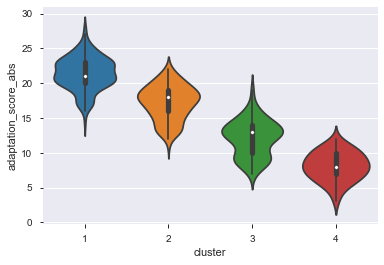

In [38]:
sns.violinplot(x='cluster', y='adaptation_score_abs', data=df)

### Cluster exploration
Explore how the farmer's characteristics change between the different clusters to see what makes them different

In [39]:
# Score
df.groupby('cluster').agg(num = ('farmer_id','count'), mean_adapt_score = ('adaptation_score_abs', 'mean'), mean_group = ('group','mean')).style.bar(align='mid',color =['#d65f5f','#5fba7d'])

,num,mean_adapt_score,mean_group
cluster,,,
1,285,21.4386,0.877193
2,149,17.2282,1
3,65,12.1385,0.769231
4,49,8.06122,1


In [40]:
# Transport
df.groupby('cluster').agg(mean_car = ('car','mean'), mean_bicycle = ('bicycle','mean'),mean_tractor = ('tractor','mean'),mean_ploughing_cart = ('ploughing_cart','mean'),
                          mean_motorcycle = ('motorcycle','mean')).style.bar(align='mid',color =['#d65f5f','#5fba7d'])#.T.plot.barh(figsize=(12,8))

,mean_car,mean_bicycle,mean_tractor,mean_ploughing_cart,mean_motorcycle
cluster,,,,,
1,0.0280702,0.691228,0.045614,0.140351,0.824561
2,0.0201342,0.691275,0.0201342,0.114094,0.852349
3,0,0.738462,0.0153846,0.0461538,0.815385
4,0,0.693878,0,0.0204082,0.693878


In [41]:
# Socioeconomic
df.groupby('cluster').agg(mean_bank = ('bank_account','mean'), mean_crop_insurance = ('crop_insurance','mean'), mean_life_insurance = ('life_insurance','mean'),
                          mean_cell_phone = ('cell_phone','mean'), mean_cooler = ('cooler','mean'), mean_electricity = ('electricity','mean'),
                         mean_fridge = ('fridge','mean'), mean_housing = ('housing','mean'), mean_loan = ('loan','mean'), 
                          mean_tv = ('tv','mean')).style.bar(align='mid',color =['#d65f5f','#5fba7d'])

,mean_bank,mean_crop_insurance,mean_life_insurance,mean_cell_phone,mean_cooler,mean_electricity,mean_fridge,mean_housing,mean_loan,mean_tv
cluster,,,,,,,,,,
1,0.992982,0.694737,0.592982,0.985965,0.940351,1,0.505263,0.529825,0,0.996491
2,0.993289,0.684564,0.510067,0.959732,0.946309,0.986577,0.362416,0.657718,0.00671141,0.986577
3,1,0.492308,0.415385,0.953846,0.953846,1,0.461538,0.569231,0,1
4,0.938776,0.387755,0.244898,0.959184,0.979592,0.979592,0.367347,0.612245,0.0204082,1


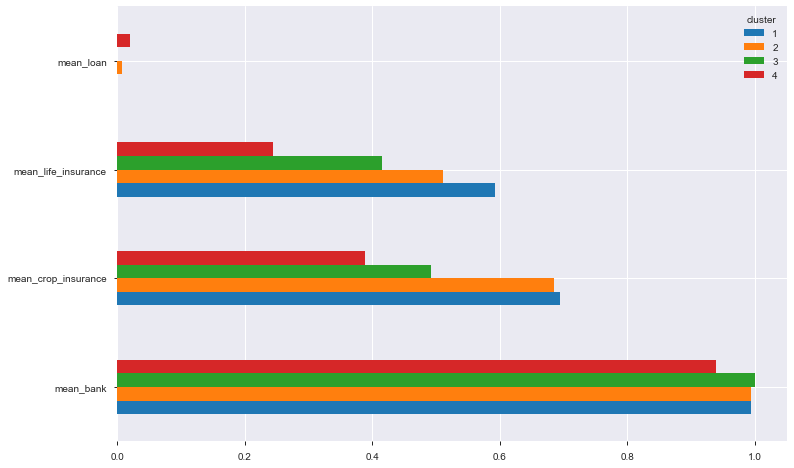

In [42]:
# Socioeconomic
df.groupby('cluster').agg(mean_bank = ('bank_account','mean'), mean_crop_insurance = ('crop_insurance','mean'), mean_life_insurance = ('life_insurance','mean'),
                          mean_loan = ('loan','mean')).T.plot.barh(figsize=(12,8))

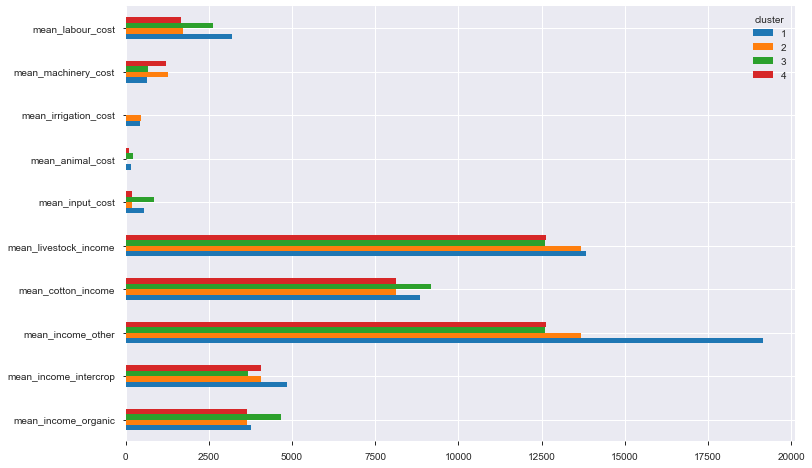

In [43]:
# Profit and Loss
df.groupby('cluster').agg(mean_income_organic = ('income_organic','mean'), mean_income_intercrop = ('income_intercrop','mean'), mean_income_other = ('income_other','mean'), 
                          mean_cotton_income = ('cotton_income','mean'), mean_livestock_income = ('livestock_income','mean'),
                          mean_input_cost = ('input_cost','mean'), mean_animal_cost = ('animal_cost','mean'), mean_irrigation_cost = ('irrigation_cost','mean'), 
                          mean_machinery_cost = ('machinery_cost','mean'), mean_labour_cost = ('labour_cost','mean')).T.plot.barh(figsize=(12,8))

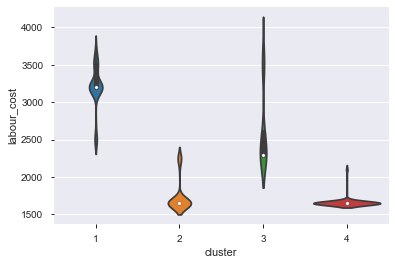

In [44]:
sns.violinplot(x='cluster', y='labour_cost', data=df.query('income_other < 50000'))

In [45]:
df.groupby('cluster')[var_importance['var'][:10]].mean()

,irrigation_source,irrigation_cost,irrigation_status,total_cost,labour_cost,life_insurance,intercrop_name,seed_type,machinery_cost,weeder
cluster,,,,,,,,,,
1,2.126316,444.694737,0.000000,5070.326316,3205.263158,0.592982,0.0,1.0,633.473684,0.487719
2,2.181208,472.315436,0.000000,3681.375839,1732.550336,0.510067,1.0,0.0,1276.510067,0.489933
3,0.000000,0.000000,1.000000,4427.261538,2620.000000,0.415385,0.0,1.0,667.846154,0.492308
4,0.000000,0.000000,0.979592,3173.469388,1659.183673,0.244898,1.0,0.0,1200.000000,0.612245


In [46]:
df.groupby('cluster')['irrigation_source'].value_counts()

cluster  irrigation_source
1        2                    201
         1                     44
         4                     34
         3                      4
         6                      2
2        2                    119
         4                     16
         1                     11
         3                      2
         6                      1
3        0                     65
4        0                     49
Name: irrigation_source, dtype: int64

#### Explore only variables that are not contained in the calculation of the Adaptation score

In [47]:
adapt = pd.read_csv('SOLIDARIDAD - DATASETS/INDIA_COTTON/IN_cotton_adaptation.csv')

In [48]:
non_adapt_vars = list(set(df.columns) - set(adapt.columns))

In [49]:
non_adapt_vars

['postharvest_acre',
 'total_cost',
 'cows',
 'cluster',
 'income_organic',
 'goats',
 'bulls',
 'other_cost',
 'staple_lengt',
 'input_cost',
 'mitigation_score_abs',
 'buffalos',
 'income_other',
 'sheep',
 'machinery_cost',
 'cotton_income',
 'irrigation_cost',
 'biopesticide',
 'animal_cost',
 'intercrop_rate',
 'landholding',
 'livestock_income',
 'cotton_price',
 'poultry',
 'labour_cost',
 'intercrop_name',
 'income_intercrop']

#### Exploring income variables in the clusters

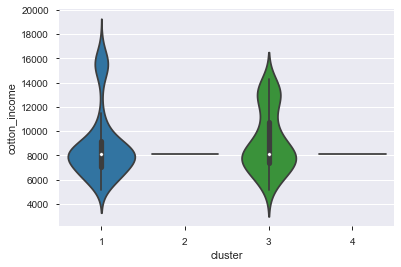

In [50]:
sns.violinplot(x='cluster', y='cotton_income', data=df)

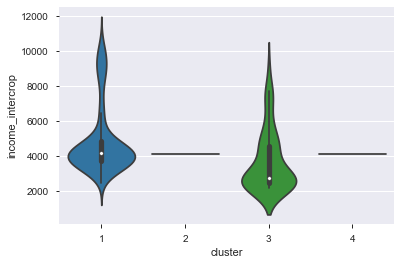

In [51]:
sns.violinplot(x='cluster', y='income_intercrop', data=df)

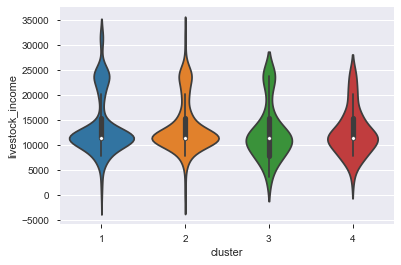

In [52]:
sns.violinplot(x='cluster', y='livestock_income', data=df)

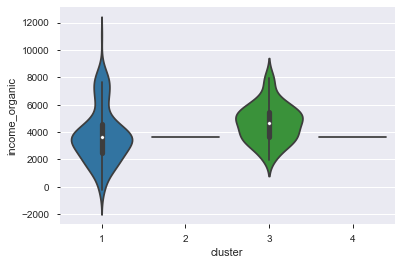

In [53]:
sns.violinplot(x='cluster', y='income_organic', data=df)

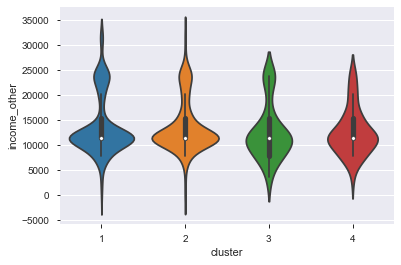

In [54]:
# Filtering for Income Other over 50,000
sns.violinplot(x='cluster', y='income_other', data=df.query('income_other < 50000'))

### Exploring Cost Variables in the cluster

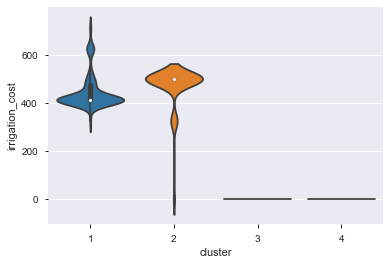

In [55]:
sns.violinplot(x='cluster', y='irrigation_cost', data=df)

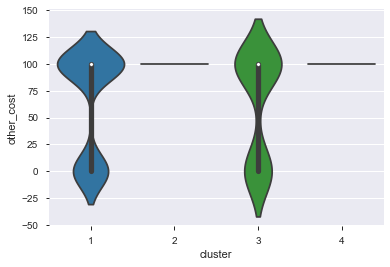

In [56]:
sns.violinplot(x='cluster', y='other_cost', data=df)

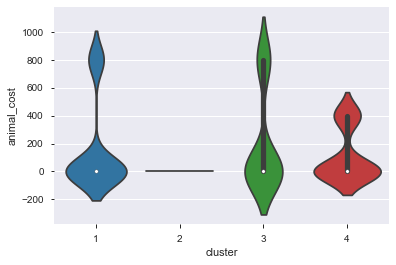

In [57]:
sns.violinplot(x='cluster', y='animal_cost', data=df)

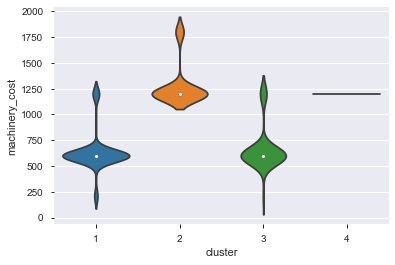

In [58]:
sns.violinplot(x='cluster', y='machinery_cost', data=df)

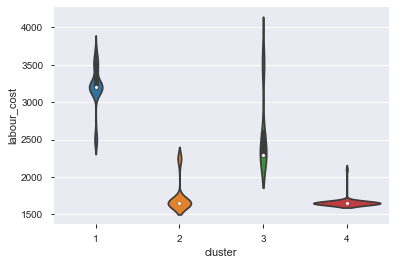

In [59]:
sns.violinplot(x='cluster', y='labour_cost', data=df)

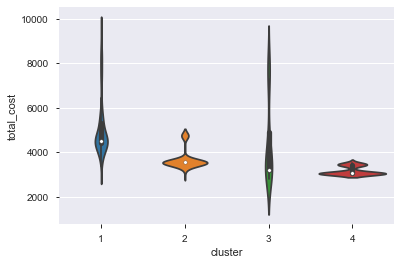

In [60]:
sns.violinplot(x='cluster', y='total_cost', data=df)

### Exploring animal ownership

In [61]:
df.groupby('cluster')['bulls','buffalos','poultry','cows','goats','sheep'].mean().style.bar(align='mid',color =['#d65f5f','#5fba7d'])

,bulls,buffalos,poultry,cows,goats,sheep
cluster,,,,,,
1,1.94035,1.77544,1.90877,1.02456,1.82807,1.97193
2,1.88591,1.8255,1.88591,1.01342,1.83893,1.96644
3,1.90769,1.83077,1.96923,1.04615,1.87692,2
4,1.95918,1.87755,1.91837,1.02041,1.79592,1.97959


In [62]:
df.groupby('cluster')['biopesticide'].mean()

cluster
1    268.596491
2    213.422819
3    313.230769
4    206.122449
Name: biopesticide, dtype: float64

In [63]:
df.groupby('cluster')['income_organic'].mean()

cluster
1    3762.992281
2    3658.500000
3    4681.409231
4    3658.500000
Name: income_organic, dtype: float64

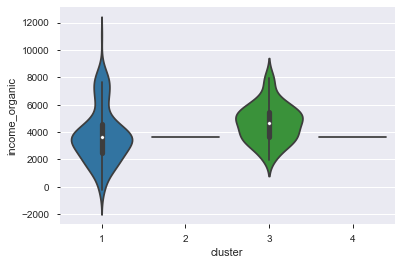

In [64]:
sns.violinplot(x='cluster', y='income_organic', data=df)

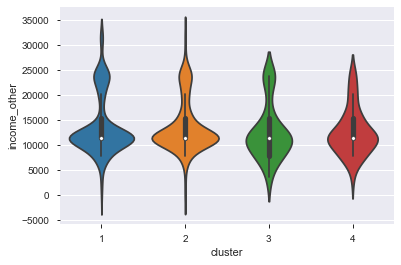

In [65]:
sns.violinplot(x='cluster', y='income_other', data=df.query('income_other < 50000'))

In [66]:
df.groupby('cluster')['postharvest_acre'].mean()

cluster
1    0.543860
2    0.567114
3    0.561538
4    0.530612
Name: postharvest_acre, dtype: float64

In [67]:
df.groupby('cluster').group.value_counts()

cluster  group
1        1        250
         0         35
2        1        149
3        1         50
         0         15
4        1         49
Name: group, dtype: int64